In [ ]:
### Parkinson's Dataset (UCI)
The dataset was created by Athanasios Tsanas and Max Little of the University of Oxford,
in collaboration with 10 medical centers in the US and Intel Corporation who 
developed the telemonitoring device to record the speech signals. The 
original study used a range of linear and nonlinear regression methods to 
predict the clinicians Parkinsons disease symptom score on the UPDRS scale.

DATA SET INFORMATION:

This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinsons disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patients homes.

Columns in the table contain subject number, subject age, subject gender, 
time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 
16 biomedical voice measures. Each row corresponds to one of 5,875 voice 
recording from these individuals. The main aim of the data is to predict the 
motor and total UPDRS scores (motor_UPDRS and total_UPDRS) from the 16 
voice measures.


ATTRIBUTE INFORMATION:

subject# - Integer that uniquely identifies each subject
age - Subject age
sex - Subject gender 0 - male, 1 - female
test_time - Time since recruitment into the trial. The integer part is the 
number of days since recruitment.
motor_UPDRS - Clinicians motor UPDRS score, linearly interpolated
total_UPDRS - Clinicians total UPDRS score, linearly interpolated
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of 
variation in fundamental frequency
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - 
Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
RPDE - A nonlinear dynamical complexity measure
DFA - Signal fractal scaling exponent
PPE - A nonlinear measure of fundamental frequency variation

In [11]:
%matplotlib inline
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("parkinsons_updrs.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv("parkinsons_updrs.csv")

# Separate features (X) and target (y)
# Use 'total_UPDRS' as the target (you could also try 'motor_UPDRS')
X = df.drop(columns=["total_UPDRS"])
y = df["total_UPDRS"]

# Combine for quick view (optional)
df_clean = pd.concat([X, y.rename("total_UPDRS")], axis=1)

# Display first 5 rows
df_clean.head()


,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,1,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [8]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
df.describe()

Dataset Shape: (5875, 22)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR        

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000034,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


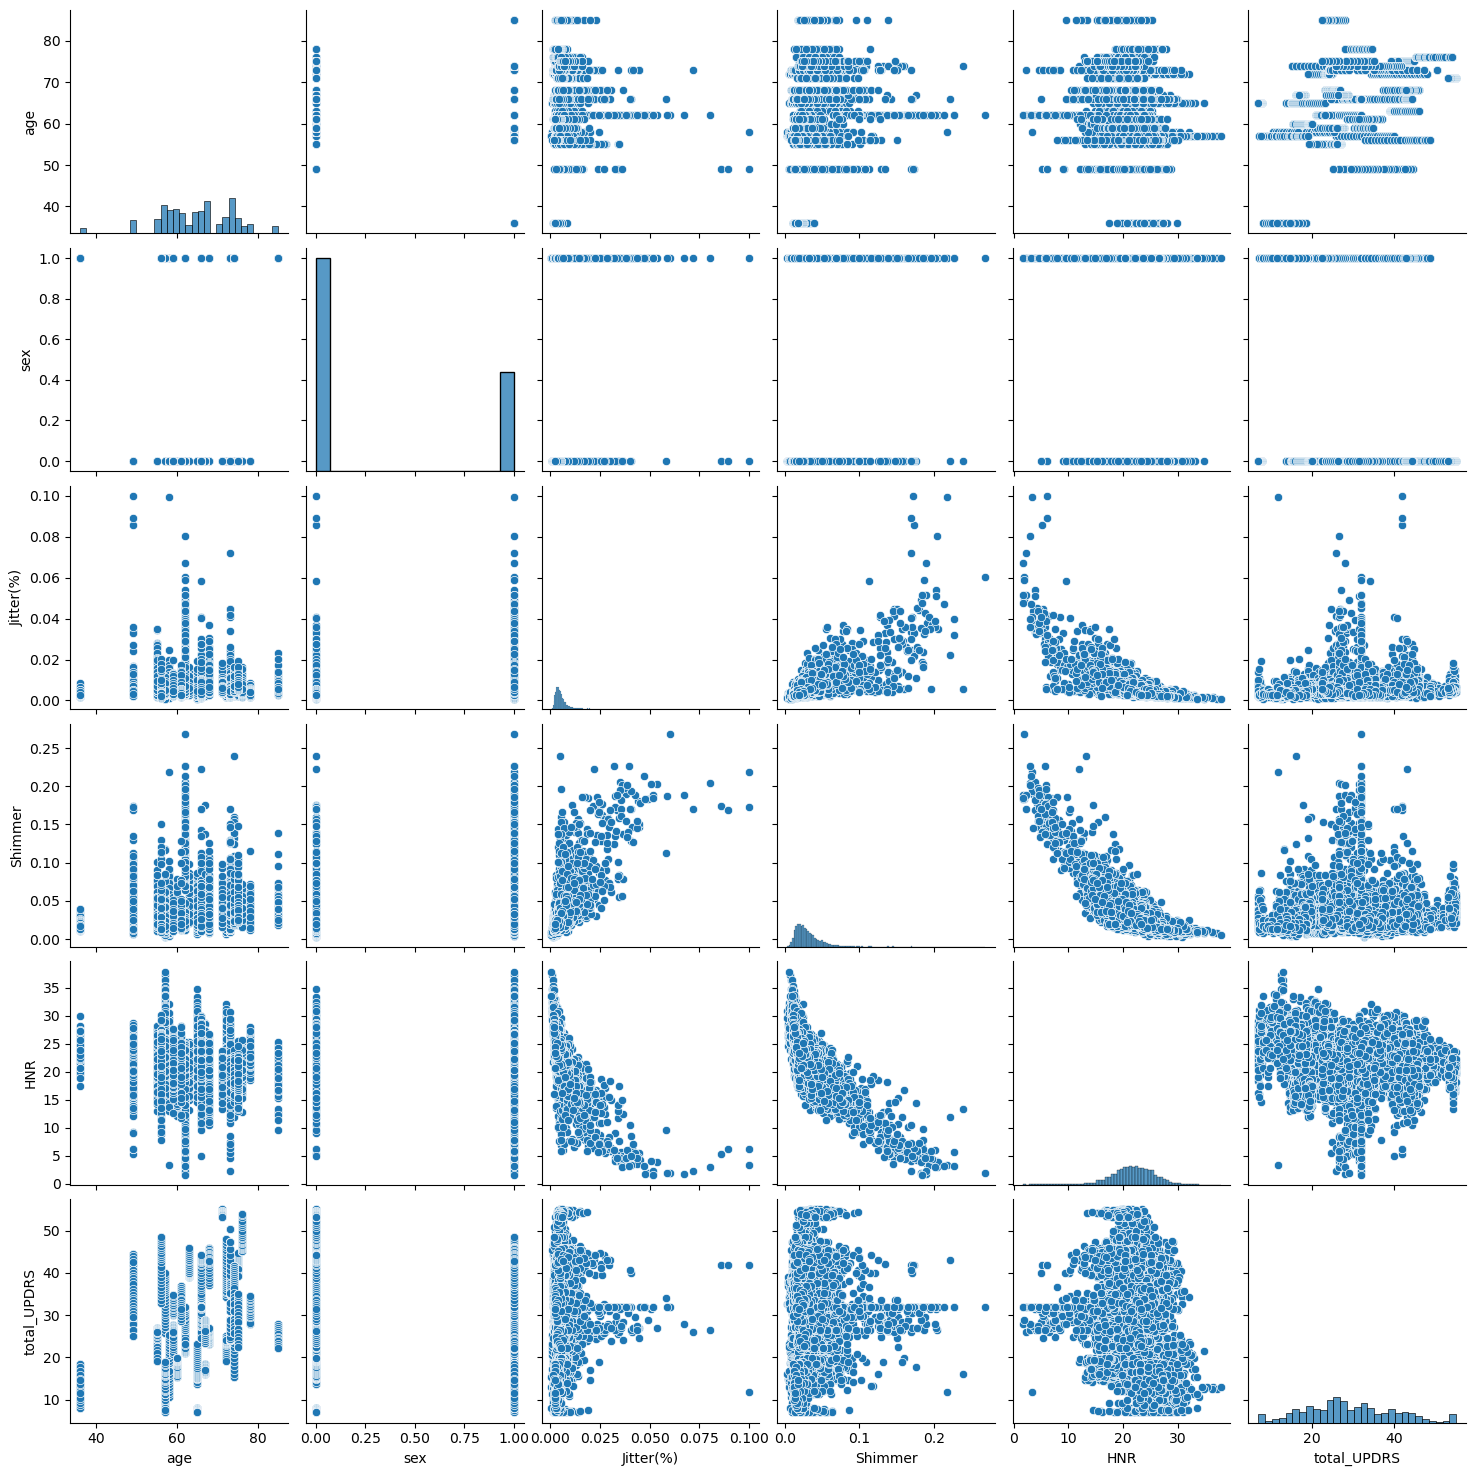

In [29]:
#pairplot visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with only numeric features
selected_cols = ["age", "sex", "Jitter(%)", "Shimmer", "HNR", "total_UPDRS"]

# Ensure selected columns are numeric
df_pair = df[selected_cols].apply(pd.to_numeric, errors='coerce')

sns.pairplot(df_pair)
plt.show()


### Question 1:

From the pairplot above, which two features seem most strongly correlated with the target variable `total_UPDRS`, and could therefore be the most useful predictors of Parkinson’s disease severity?

### Answer:

From the pairplot, `Jitter(%) and Shimmer appear most strongly correlated with `total_UPDRS`.  
These features show a clear trend with the target variable, indicating that as the values of `Jitter(%)` and `Shimmer` increase, the UPDRS score tends to increase as well.  
This suggests that these two vocal features could be particularly useful predictors for assessing the severity of Parkinson’s disease.

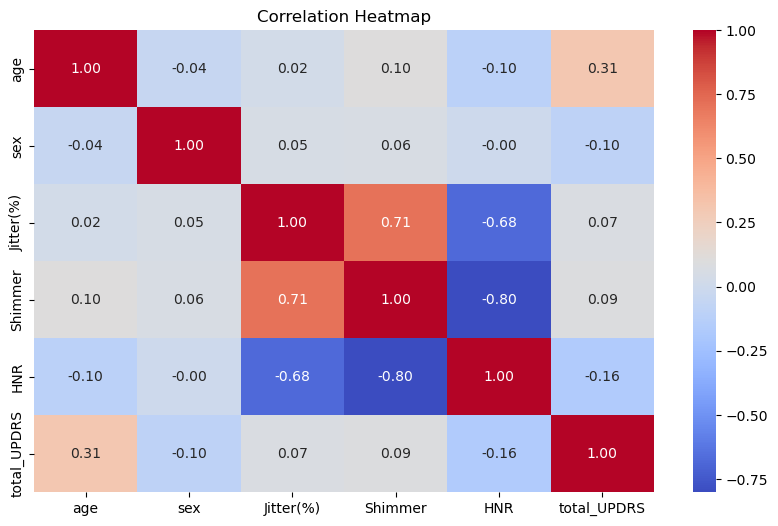

In [15]:
##heatmap visualisation

plt.figure(figsize=(10,6))
sns.heatmap(df_pair.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Question 2 :

Looking at the correlation heatmap of features with `total_UPDRS`, which pair of features are most strongly correlated with each other? What might this imply for data analysis or modeling?

### Answer:

From the correlation heatmap, `Jitter(%)` and `Shimmer` appear to be the most strongly correlated pair among the selected features.  


In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Display number of samples in training and test sets
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# Display shapes of X and y splits for verification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Training samples: 4112
Test samples: 1763
X_train shape: (4112, 21)
X_test shape: (1763, 21)
y_train shape: (4112,)
y_test shape: (1763,)


### Question3: 

Why split the dataset into training and testing dataset?

We split the dataset into training and testing sets to evaluate how well our model performs on unseen data. The training set is used to teach the model, while the testing set checks its ability to generalize. This helps prevent overfitting and ensures the model makes reliable predictions on new data.


Linear Regression Performance:
R² Score: 0.9098165934299791
RMSE: 3.1849418133307656
MAE: 2.3678375349783023
Approximate Accuracy (within ±2 points): 0.5484968803176404


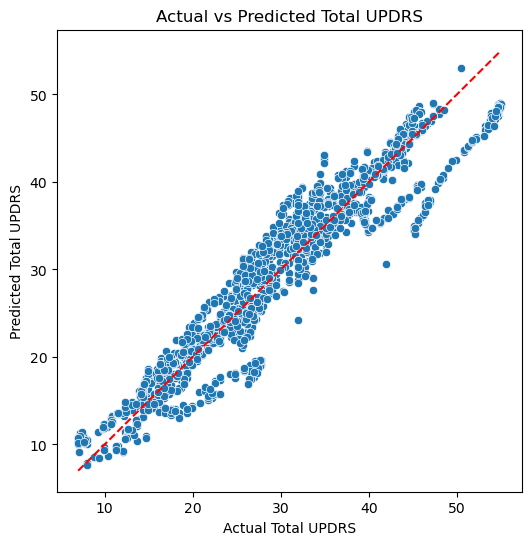

In [25]:
# Import regression model and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Approximate accuracy: predictions within ±2 points of actual
tolerance = 2
approx_accuracy = np.mean(np.abs(y_test - y_pred) <= tolerance)

print("Linear Regression Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print(f"Approximate Accuracy (within ±{tolerance} points):", approx_accuracy)

#Actual vs Predicted 
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total UPDRS")
plt.ylabel("Predicted Total UPDRS")
plt.title("Actual vs Predicted Total UPDRS")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

### Question 4: Why does Logistic Regression assume a linear decision boundary?

Logistic Regression models the probability of a categorical outcome using the logistic (sigmoid) function applied to a linear combination of features.  
This creates a linear decision boundary in the feature space because the model predicts a class based on whether the linear combination of inputs crosses a threshold (typically 0.5).  

In regression problems like the Parkinson’s dataset, we are not predicting classes but a continuous variable (`total_UPDRS`).  
Instead of a decision boundary, Linear Regression assumes a linear relationship between the input features and the target variable. That is, it assumes `total_UPDRS` can be approximated as a weighted sum of the features plus a constant (intercept).


### Question 5: Does this assumption hold for the Parkinson’s dataset? Why or why not?

The assumption of linearity may partially hold for the Parkinson’s dataset:  
- Features like `Jitter(%)` and `Shimmer` show a roughly linear trend with `total_UPDRS` in the pairplot.  
- However, other features may have non-linear or complex relationships with the target.  

This means a linear regression model can capture some patterns, but more advanced models (like polynomial regression or tree-based models) could better capture non-linear relationships if present.

Approximate accuracy within ±2 points: 0.9971639251276234
Random Forest Regression Performance:
R² Score: 0.9990093124991511
RMSE: 0.33381552142816545
MAE: 0.15803388655700554


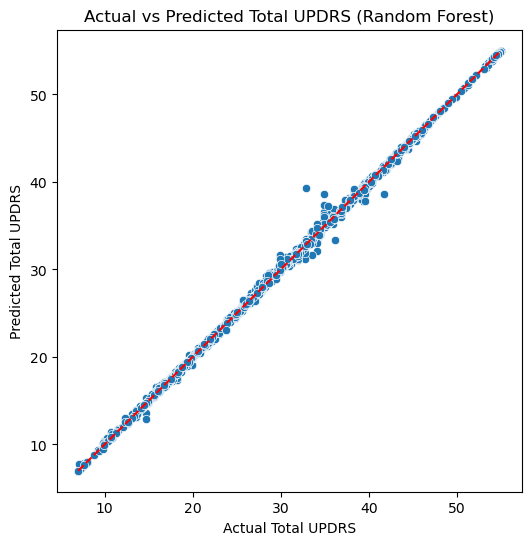

In [26]:
# Import RandomForestRegressor and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

tolerance = 2
accuracy = np.mean(np.abs(y_test - y_pred_rf) <= tolerance)
print(f"Approximate accuracy within ±{tolerance} points:", accuracy)

print("Random Forest Regression Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# Plot Actual vs Predicted Total UPDRS
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Total UPDRS")
plt.ylabel("Predicted Total UPDRS")
plt.title("Actual vs Predicted Total UPDRS (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

### Question 6:

If we increased the number of trees (`n_estimators`) in Random Forest, how might the performance change?

### Answer:

Increasing `n_estimators` generally improves the stability and accuracy of the Random Forest model.  
More trees reduce the effect of randomness in individual trees, making predictions less sensitive to noise and improving generalization.  
However, after a certain point, adding more trees gives diminishing returns and increases computation time without significant improvement.


### Question 7:

Between Linear Regression and Random Forest Regression, which model performed better? Why might that be?

### Answer:

Random Forest Regression often performs better on the Parkinson’s dataset because it can capture non-linear relationships and complex interactions between features.  
Linear Regression assumes a strict linear relationship between features and `total_UPDRS`, which may not hold perfectly for all vocal features.  
Thus, Random Forest can fit the data more flexibly and achieve lower errors (RMSE/MAE) and higher R² compared to Linear Regression.


### Question 8:

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

### Answer:

With a larger, noisy dataset, Random Forest is likely to generalize better.  
- It is robust to noise because it averages predictions from many trees.  
- It can handle feature interactions and non-linearities better than Linear Regression.  
- Linear Regression may be heavily affected by noisy features or outliers since it tries to fit a single linear relationship to all the data.
